<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Tugas%20KTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


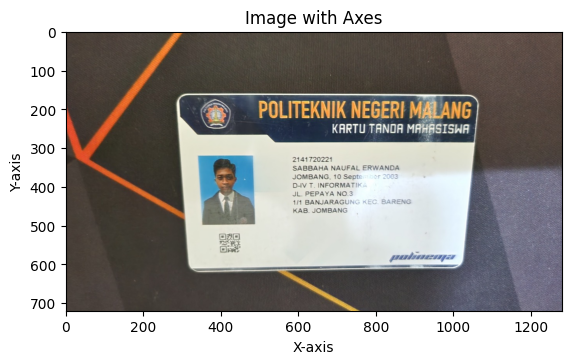

In [13]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
image = cv2.imread( '/content/drive/MyDrive/PCVK/ktm.jpg')
# Menampilkan gambar dengan sumbu x dan y
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Image with Axes")
plt.show()

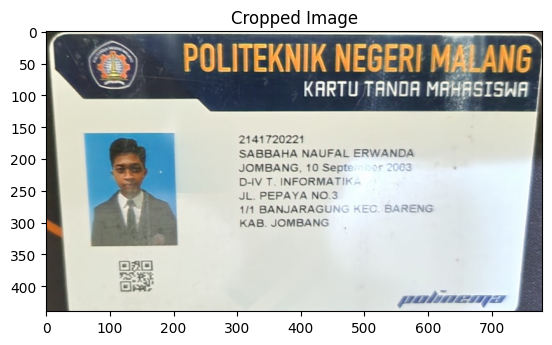

In [14]:
# Memotong bagian tertentu dari citra
cropped_img = image[160:600, 280:1060]  # Swapped the column indices

# Menampilkan citra hasil pemotongan
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

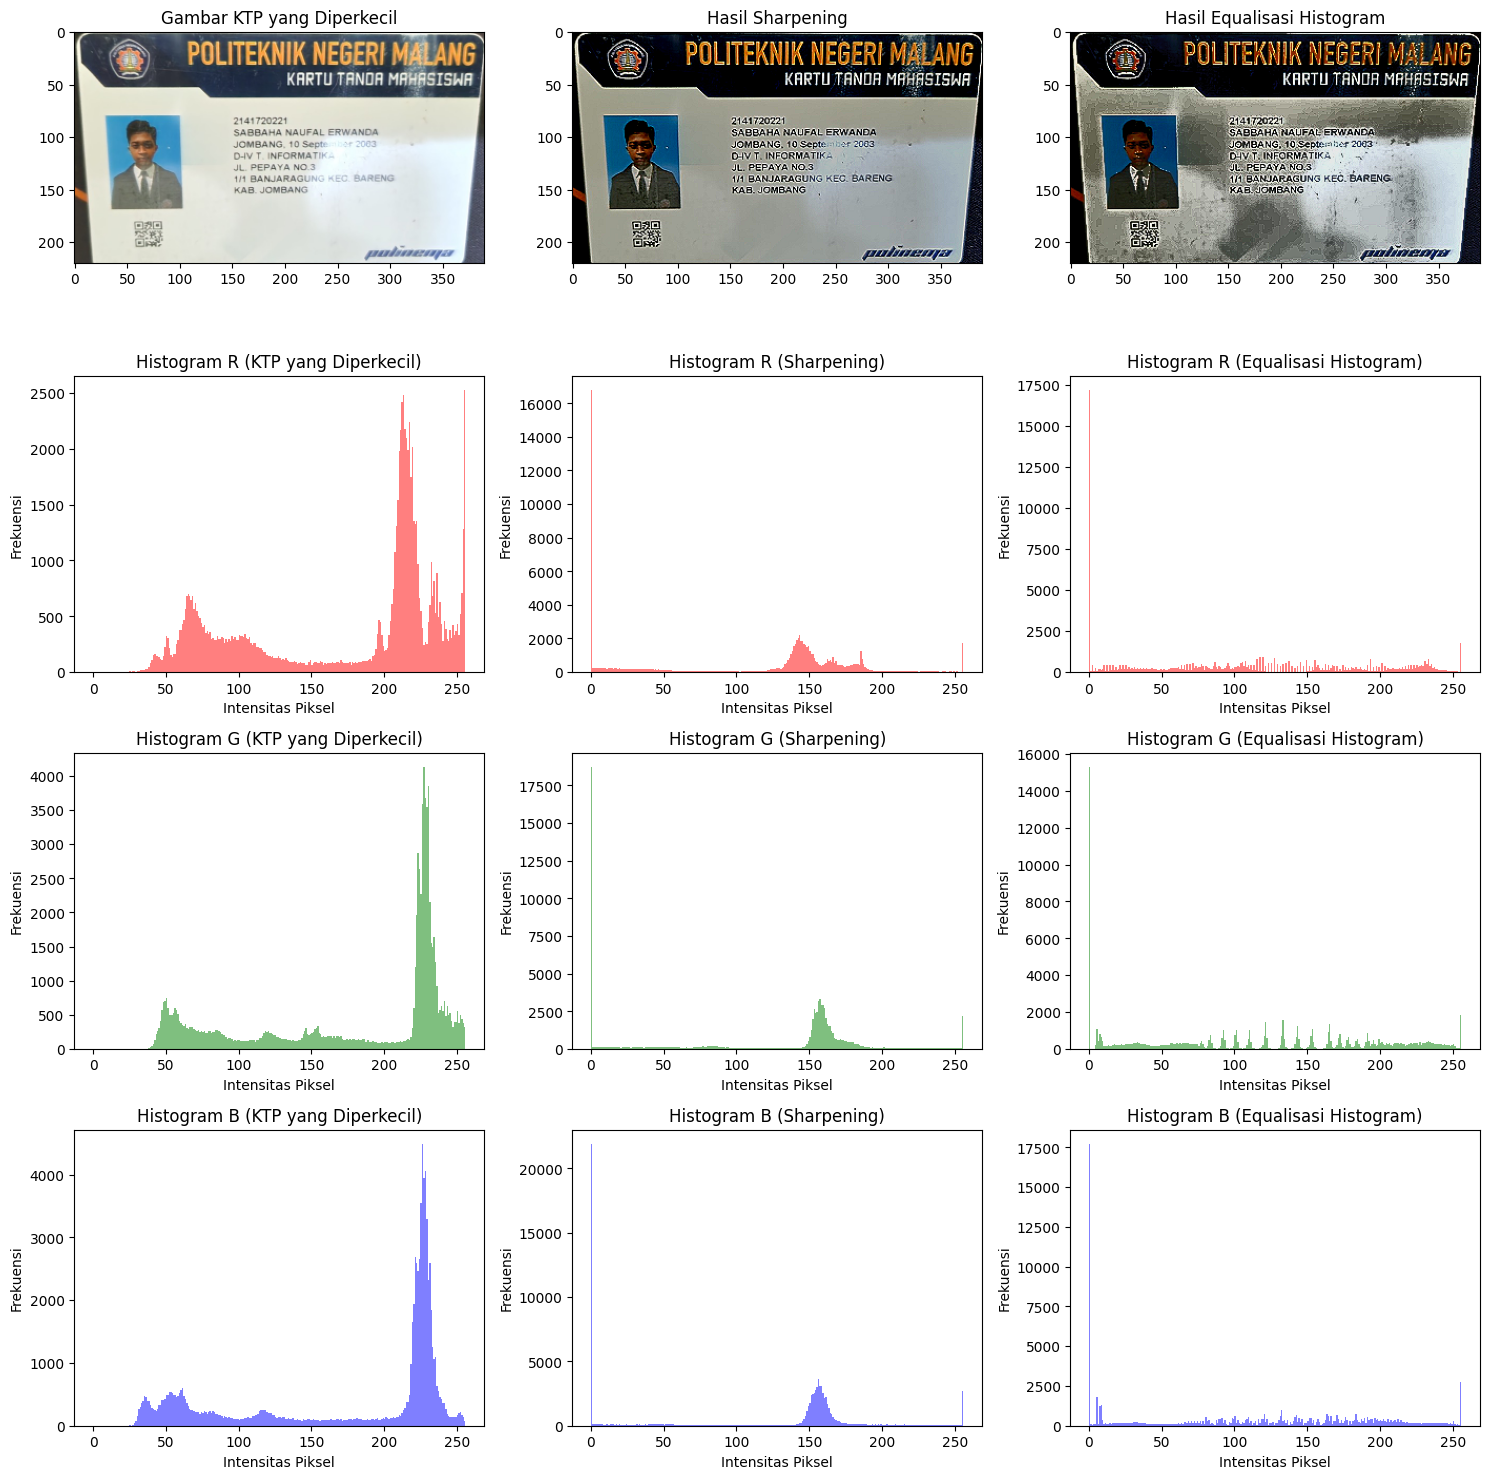

In [18]:
# Fungsi untuk penyesuaian kecerahan
def Brightness(cropped_img, brightness_adjustment):
    # Menambahkan nilai brightness_adjustment langsung pada gambar
    return cv2.add(cropped_img, brightness_adjustment)

# Fungsi untuk sharpening
def Sharpening(cropped_img, brightness_adjustment=0):
    # Mengurangi brightness jika brightness_adjustment bernilai negatif
    if brightness_adjustment < 0:
        cropped_img = Brightness(cropped_img, brightness_adjustment)

    kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(cropped_img, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram (pada citra warna)
def HistogramEqualization(cropped_img):
    img_yuv = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])  # Equalisasi hanya pada channel luminance (kecerahan)
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)  # Konversi kembali ke BGR

# Meresize gambar
ktp_image_resized = cv2.resize(cropped_img, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening dengan pengurangan brightness sebesar 70
result_sharpened = Sharpening(ktp_image_resized, brightness_adjustment=-70)

# Melakukan equalisasi histogram pada citra warna
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar dan histogram per channel warna
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Menampilkan gambar asli yang diperkecil
axs[0, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Gambar KTP yang Diperkecil')

# Menampilkan histogram gambar asli yang diperkecil untuk setiap channel warna
colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    axs[i+1, 0].hist(ktp_image_resized[:, :, i].ravel(), bins=256, range=[0, 256], color=col, alpha=0.5)
    axs[i+1, 0].set_title(f'Histogram {col.upper()} (KTP yang Diperkecil)')
    axs[i+1, 0].set_xlabel('Intensitas Piksel')
    axs[i+1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar hasil sharpening
axs[0, 1].imshow(cv2.cvtColor(result_sharpened, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Hasil Sharpening')

# Menampilkan histogram hasil sharpening untuk setiap channel warna
for i, col in enumerate(colors):
    axs[i+1, 1].hist(result_sharpened[:, :, i].ravel(), bins=256, range=[0, 256], color=col, alpha=0.5)
    axs[i+1, 1].set_title(f'Histogram {col.upper()} (Sharpening)')
    axs[i+1, 1].set_xlabel('Intensitas Piksel')
    axs[i+1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar hasil equalisasi histogram
axs[0, 2].imshow(cv2.cvtColor(result_equalized, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('Hasil Equalisasi Histogram')

# Menampilkan histogram hasil equalisasi histogram untuk setiap channel warna
for i, col in enumerate(colors):
    axs[i+1, 2].hist(result_equalized[:, :, i].ravel(), bins=256, range=[0, 256], color=col, alpha=0.5)
    axs[i+1, 2].set_title(f'Histogram {col.upper()} (Equalisasi Histogram)')
    axs[i+1, 2].set_xlabel('Intensitas Piksel')
    axs[i+1, 2].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()
